# ___Cost Functions: Intuition___
------------------

In [100]:
import numpy as np
from numpy.typing import NDArray
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# MODEL: y = wx + b
# PARAMETERS: w, b
# MODEL: f()
# COST FUNCTION: j()

# w and b are called collectively called as coefficients or separately as weights and biases.
# we need to find the best possible values for w and b, such that our estimates end upas close as possible to the real targets.
# what the cost function does is that it measures the difference between the model's predictions and the true target values.

# ___$j(w, b) = \frac{1}{2N}\sum_{i = 0}^{N}(f(x_i) - y_i)^2$___

In [5]:
# f(x_i) = is the prediction for the ith record (y_hat_i)
# f(x_i) - y_i = gives the difference between the prediction and the actual y value.
# (f(x_i) - y_i)^2 gives us the squared error, which will cancel out signs

# for this reason, this cost function is also called the squared error cost function.
# there are a plethora of cost functions available to use with linear regression models but squared error cost functions are by far the most common
# type of cost functions used in linera regression.

# cost function gives us the half of the average of squares of such differences across all N records.
# our goal is to make j(w, b) as small as possible, i.e bring the predictions and targets as close as possible :)

In [6]:
# let's think of an oversimplified version of the model, 
# say that we do not have an intercept (bias) term in the model and the model could simply be defined in the form of x = mx
# now we only need to find the gradient (slope or weigth)

In [83]:
# numba doesn't support the use of fstrings! :(

def cost_function(predictions: NDArray[np.float64], targets: NDArray[np.float64]) -> np.float64:
    """
    computes the average of squared differences between the actual targets and predictions.
    and returns the half of the mean squared difference.
    """
    assert predictions.size == targets.size, f"Both predictions and targets must have the same size! but received targets::{targets.size:10,d}, predictions::{predictions.size:10,d}"
    return np.square(predictions - targets).sum() / (2 * targets.size)

In [84]:
# for our bias less model,
# y_hat = f(x) = wx
# f() is our linear regression model.
# as we do not need a bias term, we only have one parameter - w

# ___$j(w) = \frac{1}{2N}\sum_{i=0}^{N}(f(x_i) - y_i)^2$___

In [85]:
# which becomes

# ___$j(w) = \frac{1}{2N}\sum_{i=0}^{N}(w \cdot x_i - y_i)^2$___

In [86]:
# let's consider some examples for a linear regression model in the form of y = mx + b

x = np.random.randint(low = 0, high = 100, size = 100)
m = 0.926383169019442
y = x * m + np.random.rand(100) # add some noise

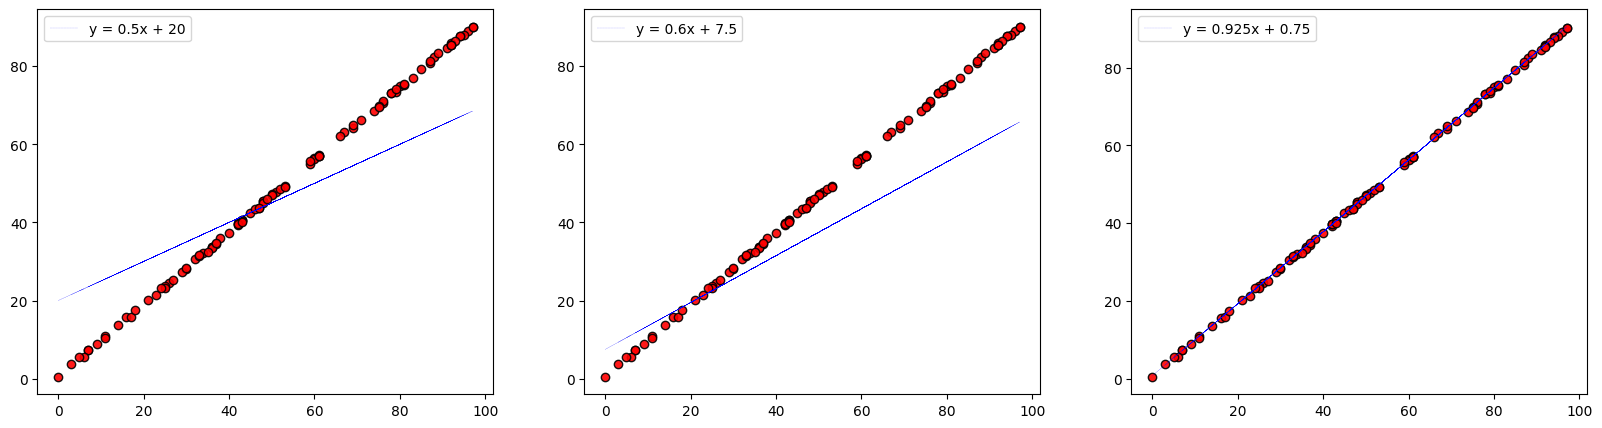

In [87]:
# the red markers show the actual data points.

fig, (axe_0, axe_1, axe_2) = plt.subplots(nrows = 1, ncols = 3)
fig.set_size_inches(20, 5)

axe_0.scatter(x, y, marker = 'o', edgecolor = "black", alpha = 0.9, color = "red")
axe_0.plot(x, x * 0.5 + 20, linestyle = '--', linewidth = 0.1, color = "blue", label = "y = 0.5x + 20")
axe_0.legend()

axe_1.scatter(x, y, marker = 'o', edgecolor = "black", alpha = 0.9, color = "red")
axe_1.plot(x, x * 0.6 + 7.5, linestyle = '--', linewidth = 0.1, color = "blue", label = "y = 0.6x + 7.5")
axe_1.legend()

axe_2.scatter(x, y, marker = 'o', edgecolor = "black", alpha = 0.9, color = "red")
axe_2.plot(x, x * 0.925 + 0.75, linestyle = '--', linewidth = 0.1, color = "blue", label = "y = 0.925x + 0.75")
axe_2.legend()

plt.show()

In [96]:
# if our model is y = 0.5 x

cost_function(predictions = x * 0.5, targets = y)

326.97300793189385

In [99]:
cost_function(predictions = x * 0.6 + 10.569, targets = y)

63.24286008612921

In [109]:
# that's a reasonably low deviation

cost_function(predictions = x * 0.9 + 0.69, targets = y)

1.0073840996169623

In [123]:
# compute this m using a loop

slopes = np.arange(start = -10, stop = 10, step = 0.001)
epsilon = 0.10
gradient = 0

for m in slopes:
    if cost_function(m * x + 0.069, y) <= epsilon:
        gradient = m
        break

In [124]:
# that's impressive :)

gradient

0.9299999999939423

In [126]:
# woohoo :)

cost_function(gradient * x + 0.069, y)

0.09700146742623644

In [135]:
# a visual representation of what a cost function does

# x is our predictor
x = np.random.randint(low = 0, high = 100, size = 100)

# m is our slope 
m = 0.54561

# y is our real targets
y = m * x + np.random.rand(100) # with a little jitter

# let's say our linear model is y = 0.6987 x + 0.2345645
y_hat = 0.6987 * x + 0.2345645

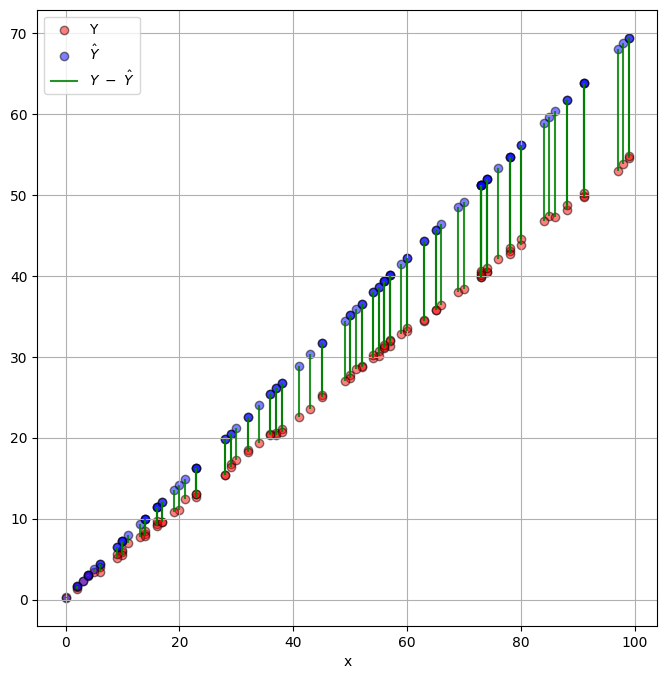

In [163]:
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)

axes.scatter(x, y, color = "red", alpha = 0.5, edgecolor = "black", label = 'Y')
axes.scatter(x, y_hat, color = "blue", alpha = 0.5, edgecolor = "black", label = r"$\hat{Y}$")
axes.vlines(x, y, y_hat, color = "green", alpha = 0.85, label = r"$Y~-~\hat{Y}$")

axes.grid()
axes.set_xlabel("x")
axes.set_ylabel("")
axes.legend()
plt.show()

In [164]:
# what the cost function computes is the half of the average of lengths of these vertical differences.

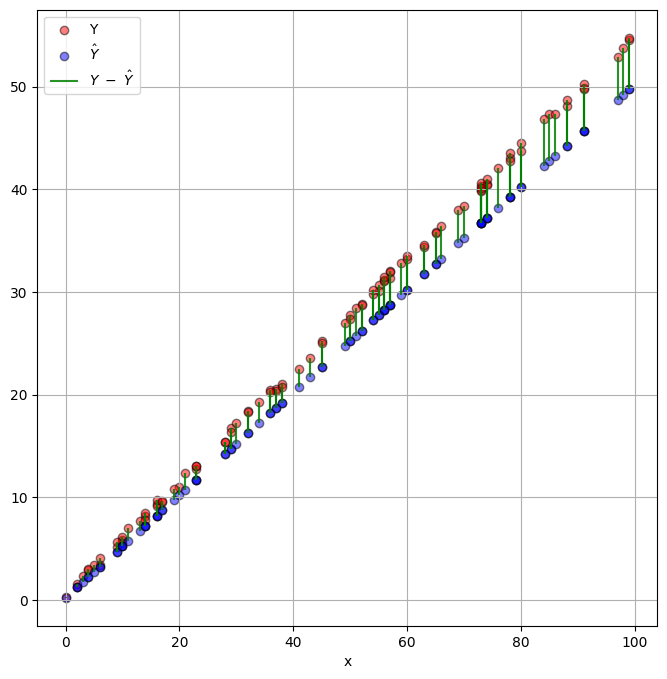

In [174]:
# as our model reaches closer to the actual linear relationship that exists between x and y, these vertical lines will become shorter.
y_hat = 0.5 * x + 0.22254

fig, axes = plt.subplots()
fig.set_size_inches(8, 8)

axes.scatter(x, y, color = "red", alpha = 0.5, edgecolor = "black", label = 'Y')
axes.scatter(x, y_hat, color = "blue", alpha = 0.5, edgecolor = "black", label = r"$\hat{Y}$")
axes.vlines(x, y, y_hat, color = "green", alpha = 0.85, label = r"$Y~-~\hat{Y}$")

axes.grid()
axes.set_xlabel("x")
axes.set_ylabel("")
axes.legend()
plt.show()

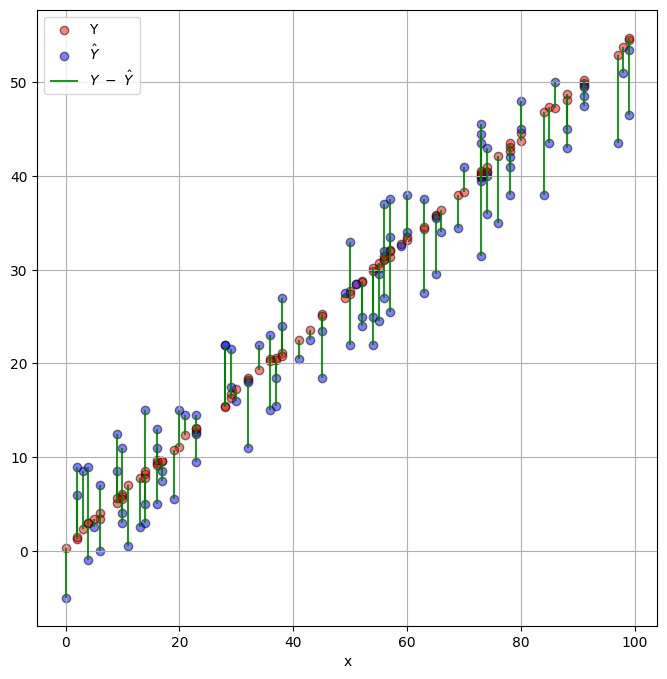

In [178]:
# THE VERTICAL JITTER DOESN'T NECESSARILY HAVE TO HAVE THE REAL TARGETS GREATER THAN THE PREDICTIONS FOR ALL VALUES OF X
# THERE CAN BE INVERSIONS TO THIS RELATIVITY.

y_hat = 0.5 * x + np.random.randint(low = -5, high = 10, size = 100) # this time, making the vertical jitter more pronounced and realistic.

fig, axes = plt.subplots()
fig.set_size_inches(8, 8)

axes.scatter(x, y, color = "red", alpha = 0.5, edgecolor = "black", label = 'Y')
axes.scatter(x, y_hat, color = "blue", alpha = 0.5, edgecolor = "black", label = r"$\hat{Y}$")
axes.vlines(x, y, y_hat, color = "green", alpha = 0.85, label = r"$Y~-~\hat{Y}$")

axes.grid()
axes.set_xlabel("x")
axes.set_ylabel("")
axes.legend()
plt.show()